In [46]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

os.chdir("/content/gdrive/My Drive/Colab Notebooks/EVA")

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


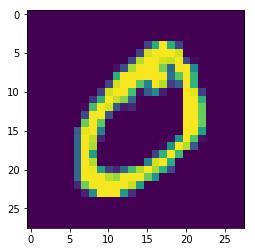

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mu = np.mean(X_train)
sigma = np.std(X_train)

In [0]:
X_train_norm = (X_train-mu)/sigma
X_test_norm = (X_test-mu)/sigma

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
__________

In [0]:
from keras import backend as K 

In [0]:
'''creating a custom loss function for adding l2 regularization.
we haven't done hyperparameter tuning for the paramter lambda and 
we  taking it to be  as 0.01''' 
def loss_l2(model_weights, val=0.01):
  model_weights = [weights.astype('float32') for weights in model_weights]
  def loss_function(y_true, y_pred):
    loss = K.categorical_crossentropy(y_true, y_pred)
    for weights in model_weights:
      loss += val*(K.sum(K.square(weights)))
    return loss
  
  return loss_function

In [51]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss=loss_l2(model.get_weights()), optimizer=Adam(lr=0.003), metrics=['accuracy'])

filepath  = os.path.join(os.getcwd(), 'weights.{epoch:02d}-{val_acc:.2f}.h5' )
checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True)

model.fit(X_train_norm, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test_norm, Y_test),
          callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 235us/step - loss: 4.1745 - acc: 0.8341 - val_loss: 3.6919 - val_acc: 0.9832

Epoch 00001: val_acc improved from -inf to 0.98320, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/weights.01-0.98.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 197us/step - loss: 3.9138 - acc: 0.8852 - val_loss: 3.6584 - val_acc: 0.9842

Epoch 00002: val_acc improved from 0.98320 to 0.98420, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/weights.02-0.98.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 196us/step - loss: 3.8871 - acc: 0.8860 - val_loss: 3.6194 - val_acc: 0.9917

Epoch 00003: val_acc improved from 0.98420 to

In [52]:
# model at iteration 25 gave the highest validation accuracy

score = model.evaluate(X_test_norm, Y_test, verbose=0)
print(score)

[3.5896307823181153, 0.994]


In [0]:
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

In [61]:
# number of misclassified images
10000-sum(y_pred == y_test)

60

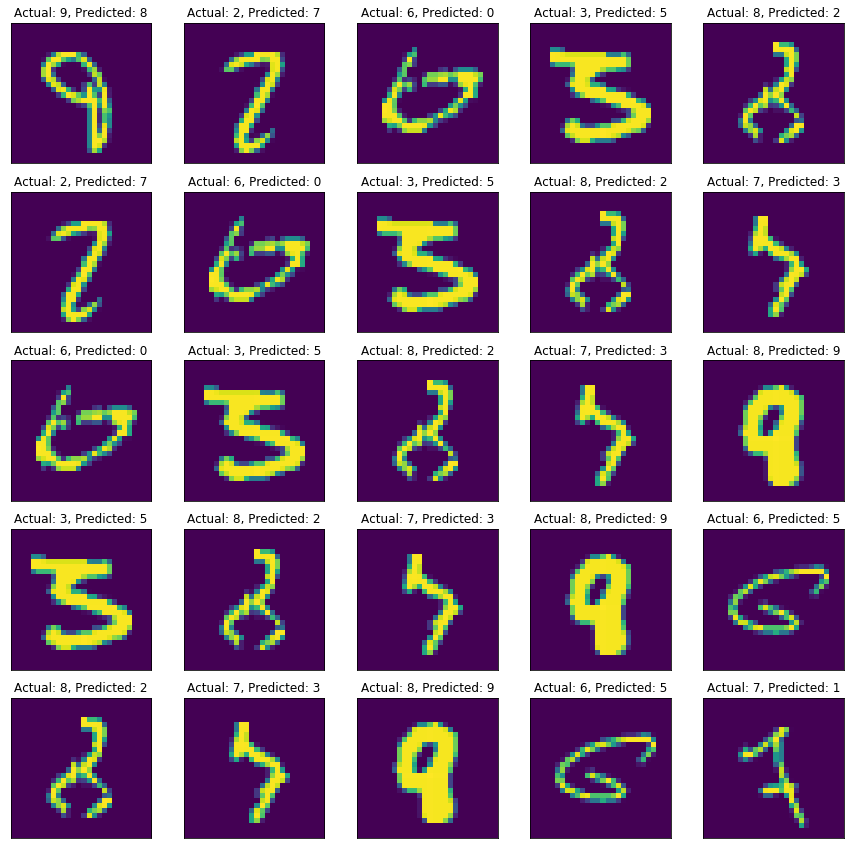

In [93]:
misclassified_indices = np.where(y_pred != y_test)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for row in range(5):
  for col in range(5):
    ax[row, col].imshow(X_test[misclassified_indices[0][row+col]])
    actual = y_test[misclassified_indices[0][row+col]]
    predicted = y_pred[misclassified_indices[0][row+col]]
    title = f'Actual: {actual}, Predicted: {predicted}'
    ax[row, col].title.set_text(title)
    ax[row, col].set_xticklabels([])
    ax[row, col].set_yticklabels([])
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
plt.show()
fig.tight_layout()

In [0]:
# Its clear from the above images that even for a human eye these might lead to inconsistent results 